# 老照片说话demo

### 获取已修复图片

In [1]:
image_path = '/home/advance/dev/insightface/亲子.jpeg'

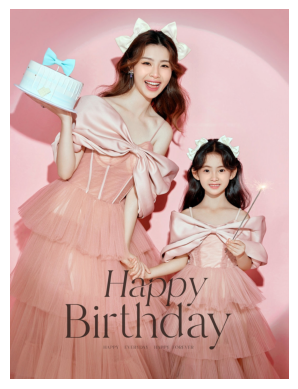

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    # 读取图片
    img = mpimg.imread(image_path)
    
    # 展示图片
    plt.imshow(img)
    plt.axis('off')  # 关闭坐标轴
    plt.show()
show_image(image_path)

### 根据人物对图片进行左右分割

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations
/home/advance/miniconda3/envs/insightface/lib/python3.8/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/advance/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/advance/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/advance/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/advance/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/advance/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127

To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4



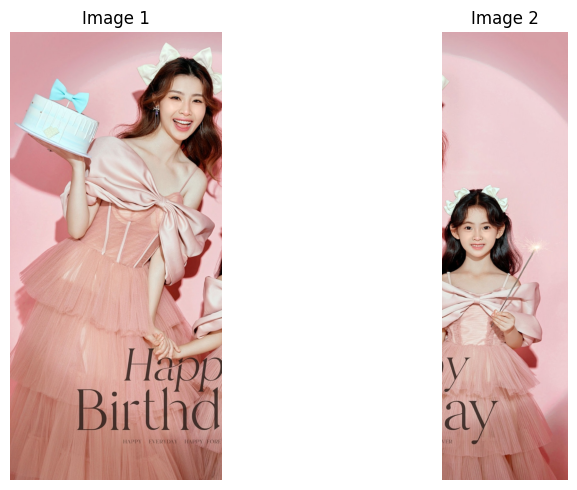

In [3]:
from did_t2v import *
from show_image import show_two_images
bboxes, img = get_face_bboxes(image_path)
image2video_list = list_single_image_faces_info(img, bboxes)

left_image = image2video_list[0][0]
right_image = image2video_list[1][0]
show_two_images(left_image, right_image)

### 创建文本信息A+A角色图像

In [4]:
A_image = left_image
A_text_list = ["女儿，今天你是生日女王！祝你生日快乐，笑口常开！","那我希望你的每个生日都能收到我亲手做的超级美味蛋糕！"]

### 创建文本信息B+B角色图像

In [5]:
B_image = right_image
B_text_list = ["哦，我的妈妈，谢谢你！今天我们一起庆祝，愿你的每天都像彩虹一样绚烂！","哈哈，那我可就期待了！我的妈妈大厨，让我们一起享受这美好的一天吧！"]

### 循环请求，并等待生成结果

In [6]:
did_t2v = DIDT2V()

### 得到a列表

In [7]:
a = []
for A_text in A_text_list:
    video_path = did_t2v.run(A_image, A_text)
    a.append(video_path)

upload file success
============== 女儿，今天你是生日女王！祝你生日快乐，笑口常开！
{"id":"tlk_3KxuRDB7yX5vhiY76lHgR","created_at":"2024-07-01T08:58:59.310Z","created_by":"auth0|6434b92cfb407e0d68664b2b","status":"created","object":"talk"}
task_id=======>:tlk_3KxuRDB7yX5vhiY76lHgR
{'user': {'features': ['stitch', 'no-watermark', 'clips:write', 'api-keys:write', 'subtitles', 'logo', 'translation', 'talks', 'logo', 'skip-moderation', 'skip-celebrity-detection'], 'stripe_customer_id': 'cus_NgtwQejpVq7fHK', 'stripe_plan_group': 'deid-enterprise', 'authorizer': 'basic', 'org_id': 'org_3F65YkhqT2ZOjNuEFRd38', 'owner_id': 'org_3F65YkhqT2ZOjNuEFRd38', 'id': 'auth0|6434b92cfb407e0d68664b2b', 'plan': 'deid-enterprise', 'email': 'luoxin@jshine.cc'}, 'script': {'length': 24, 'subtitles': False, 'type': 'text', 'provider': {'type': 'microsoft', 'voice_id': 'zh-CN-XiaoyiNeural'}}, 'audio_url': 'https://d-id-talks-prod.s3.us-west-2.amazonaws.com/org_3F65YkhqT2ZOjNuEFRd38/tlk_3KxuRDB7yX5vhiY76lHgR/microsoft.wav?AWSAccessKeyI

### 得到B列表

In [8]:
b = []
for B_text in B_text_list:
    video_path = did_t2v.run(B_image, B_text)
    b.append(video_path)

upload file success
============== 哦，我的妈妈，谢谢你！今天我们一起庆祝，愿你的每天都像彩虹一样绚烂！
{"id":"tlk_oLe65L-NlDPWB1PzKXYfH","created_at":"2024-07-01T08:59:28.904Z","created_by":"auth0|6434b92cfb407e0d68664b2b","status":"created","object":"talk"}
task_id=======>:tlk_oLe65L-NlDPWB1PzKXYfH
{'user': {'features': ['stitch', 'no-watermark', 'clips:write', 'api-keys:write', 'subtitles', 'logo', 'translation', 'talks', 'logo', 'skip-moderation', 'skip-celebrity-detection'], 'stripe_customer_id': 'cus_NgtwQejpVq7fHK', 'stripe_plan_group': 'deid-enterprise', 'authorizer': 'basic', 'org_id': 'org_3F65YkhqT2ZOjNuEFRd38', 'owner_id': 'org_3F65YkhqT2ZOjNuEFRd38', 'id': 'auth0|6434b92cfb407e0d68664b2b', 'plan': 'deid-enterprise', 'email': 'luoxin@jshine.cc'}, 'script': {'length': 34, 'subtitles': False, 'type': 'text', 'provider': {'type': 'microsoft', 'voice_id': 'zh-CN-XiaoyiNeural'}}, 'audio_url': 'https://d-id-talks-prod.s3.us-west-2.amazonaws.com/org_3F65YkhqT2ZOjNuEFRd38/tlk_oLe65L-NlDPWB1PzKXYfH/microsoft.wav?AWS

### 展示D-ID生成结果

In [9]:
from IPython.display import Video
Video(video_path)

### 将列表中的元素与原图进行拼接，得到aA、bB列表

In [10]:
import mov_on_image

In [11]:
video_size_left = image2video_list[0][1]
desired_video_coord_on_image_left = image2video_list[0][2]
video_size_right = image2video_list[1][1]
desired_video_coord_on_image_right = image2video_list[1][2]

In [12]:
aA = []
for a_ in a:
    output_file_path = mov_on_image.process_v2(image_path, a_, video_size_left, desired_video_coord_on_image_left)
    print(output_file_path)
    aA.append(output_file_path)

Moviepy - Building video ./temp/composite_videod7a60518-5af5-4354-98a3-76e86e17a1b0.mp4.
MoviePy - Writing audio in composite_videod7a60518-5af5-4354-98a3-76e86e17a1b0TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video ./temp/composite_videod7a60518-5af5-4354-98a3-76e86e17a1b0.mp4



t: 100%|██████████| 149/149 [00:02<00:00, 68.89it/s, now=None]WARNING:py.warnings:/home/advance/miniconda3/envs/insightface/lib/python3.8/site-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./temp/5b17bf90-e104-4723-bd02-6d6947405bc0.mp4, 2319360 bytes wanted but 0 bytes read,at frame 148/149, at time 5.92/5.93 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready ./temp/composite_videod7a60518-5af5-4354-98a3-76e86e17a1b0.mp4
./temp/composite_videod7a60518-5af5-4354-98a3-76e86e17a1b0.mp4
Moviepy - Building video ./temp/composite_video2d9b3375-9184-42ca-85ac-9c68f8223d76.mp4.
MoviePy - Writing audio in composite_video2d9b3375-9184-42ca-85ac-9c68f8223d76TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video ./temp/composite_video2d9b3375-9184-42ca-85ac-9c68f8223d76.mp4



t:  97%|█████████▋| 128/132 [00:01<00:00, 68.70it/s, now=None]WARNING:py.warnings:/home/advance/miniconda3/envs/insightface/lib/python3.8/site-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./temp/2d73a6ef-e6d5-4c15-825c-cb2b11da1577.mp4, 2319360 bytes wanted but 0 bytes read,at frame 131/132, at time 5.24/5.26 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready ./temp/composite_video2d9b3375-9184-42ca-85ac-9c68f8223d76.mp4
./temp/composite_video2d9b3375-9184-42ca-85ac-9c68f8223d76.mp4


In [13]:
bB = []
for b_ in b:
    output_file_path = mov_on_image.process_v2(image_path, b_, video_size_right, desired_video_coord_on_image_right)
    bB.append(output_file_path)

Moviepy - Building video ./temp/composite_video07d6eb74-3ba5-47a1-99fa-75d1a96e1703.mp4.
MoviePy - Writing audio in composite_video07d6eb74-3ba5-47a1-99fa-75d1a96e1703TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video ./temp/composite_video07d6eb74-3ba5-47a1-99fa-75d1a96e1703.mp4



t:  99%|█████████▉| 192/193 [00:02<00:00, 72.10it/s, now=None]WARNING:py.warnings:/home/advance/miniconda3/envs/insightface/lib/python3.8/site-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./temp/64e2354b-304c-43f2-b47d-d568b1a5cbf8.mp4, 1382400 bytes wanted but 0 bytes read,at frame 192/193, at time 7.68/7.70 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready ./temp/composite_video07d6eb74-3ba5-47a1-99fa-75d1a96e1703.mp4
Moviepy - Building video ./temp/composite_videobc5a2b33-3bed-4d54-910d-0a6cf1f6fe2a.mp4.
MoviePy - Writing audio in composite_videobc5a2b33-3bed-4d54-910d-0a6cf1f6fe2aTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video ./temp/composite_videobc5a2b33-3bed-4d54-910d-0a6cf1f6fe2a.mp4



t:  97%|█████████▋| 176/182 [00:02<00:00, 71.92it/s, now=None]WARNING:py.warnings:/home/advance/miniconda3/envs/insightface/lib/python3.8/site-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./temp/81103a29-582a-4d7f-8c13-6881b2e00b6b.mp4, 1382400 bytes wanted but 0 bytes read,at frame 181/182, at time 7.24/7.27 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

                                                              

Moviepy - Done !
Moviepy - video ready ./temp/composite_videobc5a2b33-3bed-4d54-910d-0a6cf1f6fe2a.mp4


### 展示一个合成的视频

In [14]:
Video(bB[0])

### aA列表中的视频与bB列表中的视频进行交叉合成

In [15]:
def generator(list:list):
    for element in list:
        yield element

In [16]:
aA_bB = []
gen_obj = generator(bB)
for aA_ in aA:
    aA_bB.append(aA_)
    aA_bB.append(next(gen_obj))

In [17]:
output_file_path = "concatenate_video2.mp4"
mov_on_image.concatenate_videos(aA_bB, output_file_path)

Moviepy - Building video concatenate_video2.mp4.
MoviePy - Writing audio in concatenate_video2TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video concatenate_video2.mp4



t:  21%|██        | 136/659 [00:00<00:02, 235.95it/s, now=None]WARNING:py.warnings:/home/advance/miniconda3/envs/insightface/lib/python3.8/site-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./temp/composite_videod7a60518-5af5-4354-98a3-76e86e17a1b0.mp4, 4877460 bytes wanted but 0 bytes read,at frame 149/150, at time 5.96/5.98 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

t:  70%|███████   | 463/659 [00:01<00:00, 235.08it/s, now=None]WARNING:py.warnings:/home/advance/miniconda3/envs/insightface/lib/python3.8/site-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./temp/composite_video2d9b3375-9184-42ca-85ac-9c68f8223d76.mp4, 4877460 bytes wanted but 0 bytes read,at frame 132/133, at time 5.28/5.30 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

t:  97%|█████████▋| 638/659 [00:02<00:00, 233.57it/s, now=None]WARNING:py.warnings

Moviepy - Done !
Moviepy - video ready concatenate_video2.mp4


'concatenate_video2.mp4'

In [18]:
len(aA_bB)

4

### 展示结果

In [19]:
Video(output_file_path)